In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


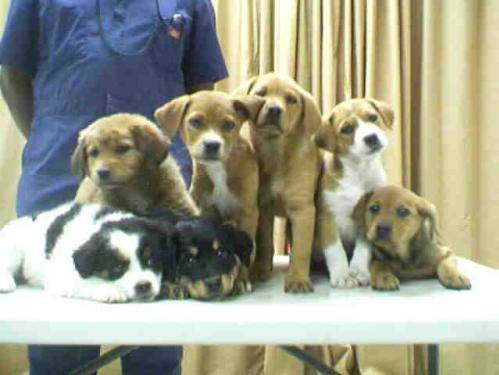

In [ ]:
# Do dataset de treino, carregue uma imagem de cachorro
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Aula_LIA/Dogs vs. Cats/Colab Notebooks/dataset_treino_2/dog/dog.12497.jpg')

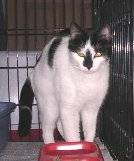

In [ ]:
# Do dataset de treino, carregue uma imagem de gato
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Aula_LIA/Dogs vs. Cats/Colab Notebooks/dataset_treino_2/cat/cat.1110.jpg')

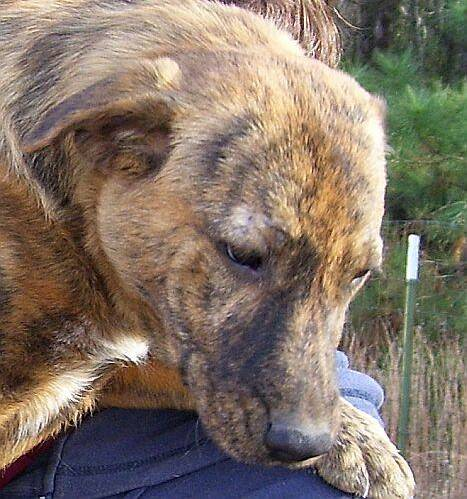

In [ ]:
# Do dataset de teste, carregue uma imagem de gato ou de cachorro
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Aula_LIA/Dogs vs. Cats/Colab Notebooks/dataset_teste/10000.jpg')

In [ ]:
import tensorflow as tf
import keras as K
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D, Dropout,MaxPooling2D, Flatten, Dense

In [ ]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [ ]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Terceira Camada de Convolução
classifier.add(Conv2D(32, (3, 3),  activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

#Normalização de pesos para evitar overfitting
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2 )

In [ ]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Aula_LIA/Dogs vs. Cats/Colab Notebooks/dataset_treino_2',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='training')

Found 20000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [ ]:
# Executando o treinamento
classifier.fit(
    training_set,
    steps_per_epoch=625,
    callbacks=[early_stopping],  # Ajustado com base no número total de imagens e batch size
    epochs=25)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3067s 5s/step - accuracy: 0.6596 - loss: 0.6190
Epoch 2/25


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 284ms/step - accuracy: 0.7470 - loss: 0.5233
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 177s 284ms/step - accuracy: 0.7681 - loss: 0.4793
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 285ms/step - accuracy: 0.7927 - loss: 0.4473
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 179s 286ms/step - accuracy: 0.8114 - loss: 0.4137
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 180s 288ms/step - accuracy: 0.8165 - loss: 0.4049
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 177s 283ms/step - accuracy: 0.8282 - loss: 0.3874
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 286ms/step - accuracy: 0.8278 - loss: 0.3748
Epoch 9/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 177s 284ms/step - accuracy: 0.8292 - loss: 0.3722
Epoch 10/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 285ms/step - accuracy: 0.8418 - loss: 0.3521
Epoch 11/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 287ms/step - accuracy: 0.8486 - loss: 0.3450
Epoch 12/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 281ms/step - accuracy: 0.8494 - loss: 0.3492
Epoch 13/25
625/62

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Previsão: Cachorro.
Acurácia: 99.98 %.


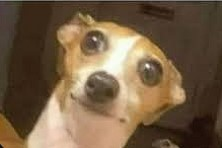

In [ ]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/drive/MyDrive/Aula_LIA/Dogs vs. Cats/Colab Notebooks/bisteca.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalizar a imagem

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/drive/MyDrive/Aula_LIA/Dogs vs. Cats/Colab Notebooks/bisteca.jpg')

Found 25000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 1764s 4s/step


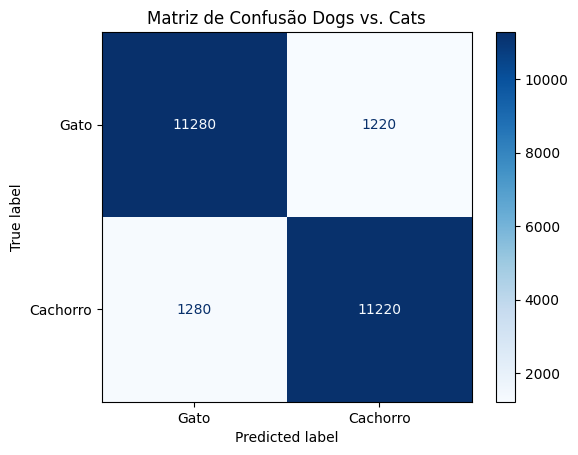

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Supondo que você tenha um conjunto de dados de teste
# Carregue as imagens de teste e suas classes verdadeiras
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Aula_LIA/Dogs vs. Cats/Colab Notebooks/dataset_treino_2',
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary',
    shuffle=False  # Importante para manter a ordem das previsões
)

# Fazendo previsões no conjunto de teste
predictions = classifier.predict(test_set)
predicted_classes = (predictions > 0.5).astype(int).flatten()  # Convertendo as previsões para 0 ou 1

# Obtendo as classes verdadeiras
true_classes = test_set.classes

# Criando a matriz de confusão
cm = confusion_matrix(true_classes, predicted_classes)

# Exibindo a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Gato', 'Cachorro'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão Dogs vs. Cats')
plt.show()